In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
# augment data
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# augmentation parameters
train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=False,
            vertical_flip=False,
            fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=False,
            vertical_flip=False,
            fill_mode='nearest'
)

In [ ]:
img1 = plt.imread('/content/drive/MyDrive/Datasets/GreekLetters/alpha/letter_bnw_test_3.jpg')

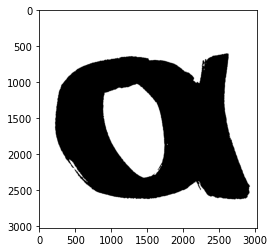

In [ ]:
plt.imshow(img1, cmap='gray')

In [ ]:
img1.shape

(3024, 3024)

In [8]:
import tensorflow as tf
from tensorflow import keras

# create model
def create_model():
    """
    Sequential CNN with 3 hidden layers.
    
    return:
        - model: return generated model
    """
    l2 = 0.001

    model = keras.models.Sequential([
        keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=((150,150,3))),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(32, (1, 1), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2)),
        keras.layers.Dense(24, activation='softmax')
    ])
        
    # set loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    # set optimizer
    opt = keras.optimizers.Adam()
    
    # set metrics
    metrics = [keras.metrics.CategoricalAccuracy(name='categorical_accuracy', dtype=None)]
    
    # compile model
    model.compile(loss=loss, optimizer=opt, metrics=metrics)

    print(model.summary())
    
    return model

In [9]:
model = create_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 36, 32)        1056      
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [10]:
#batch_size = 16

# apply augmentation to images
train_generator = train_datagen.flow_from_directory(
                    '/content/drive/MyDrive/Datasets/GreekLetters',
                    target_size=(150,150),
                    #batch_size=batch_size,
                    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
                    '/content/drive/MyDrive/Datasets/GreekLetters',
                    target_size=(150,150),
                    #batch_size=batch_size,
                    class_mode='categorical'
)

# fit model
# have to use fit_generator because we augmented
model.fit_generator(
    train_generator, 
    #steps_per_epoch=200 // batch_size,
    epochs=20,
    validation_data=val_generator,
    #validation_steps=50 // batch_size
)

Found 24 images belonging to 24 classes.
Found 24 images belonging to 24 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1/1 [==============================] - 5s 5s/step - loss: 3.3216 - categorical_accuracy: 0.0417 - val_loss: 3.3761 - val_categorical_accuracy: 0.0417
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 3.3794 - categorical_accuracy: 0.0417 - val_loss: 3.3161 - val_categorical_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 3.3101 - categorical_accuracy: 0.0833 - val_loss: 3.3112 - val_categorical_accuracy: 0.0417
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 3.3017 - categorical_accuracy: 0.0833 - val_loss: 3.3115 - val_categorical_accuracy: 0.0417
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 3.3037 - categorical_accuracy: 0.0417 - val_loss: 3.2938 - val_categorical_accuracy: 0.0417
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 3.3014 - categorical_accuracy: 0.0000e+00 - val_loss: 3.3049 - val_categorical_accuracy: 0.0417
Epoch 7/20
1/1 [=====================